## Lognormal Distrubution exercise
## Joseph Rochelle


**Exercise:**    In Section 5.4, we saw that the distribution of adult weights is approximately lognormal. One possible explanation is that the weight a person gains each year is proportional to their current weight. In that case, adult weight is the product of a large number of multiplicative factors:

w = w0 f1 f2 ... fn  

where w is adult weight, w0 is birth weight, and fi is the weight gain factor for year i.

The log of a product is the sum of the logs of the factors:

logw = logw0 + logf1 + logf2 + ... + logfn 

So by the Central Limit Theorem, the distribution of logw is approximately normal for large n, which implies that the distribution of w is lognormal.

To model this phenomenon, choose a distribution for f that seems reasonable, then generate a sample of adult weights by choosing a random value from the distribution of birth weights, choosing a sequence of factors from the distribution of f, and computing the product. What value of n is needed to converge to a lognormal distribution?

In [1]:
## Starting by loading all the libraries from Allen Downey's stats
## Reminder that none of this will work unless you fork the ThinkStats2 Github.


from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import scipy.stats

In [5]:
## Importing the first babies data fraome 
import first

live, firsts, others = first.MakeFrames()

In [2]:
## Adding the classes to get the adult weights
# Pulled the generating weight from solutions. I
# Class simply randomly assignes a birht weight and then adds random factors

def GenerateAdultWeight(birth_weights, n):
    """Generate a random adult weight by simulating annual gain.

    birth_weights: sequence of birth weights in lbs
    n: number of years to simulate

    returns: adult weight in lbs
    """
    bw = random.choice(birth_weights)
    factors = np.random.normal(1.09, 0.03, n)
    aw = bw * np.prod(factors)
    return aw

In [3]:
## This class drops any missing values from  the data frame. 
# We then generate the random births from the class above at the 40 distrubition.
# The for loop adds the birht weights for a range of 1000 just to iterate through everything
# NOtice log10 that will take what ever our distribution is that could have some skewness and log 10 to normalize
# The graph then plots out the logs 

def PlotAdultWeights(live):
    """Makes a normal probability plot of log10 adult weight.

    live: DataFrame of live births

    
    """
    birth_weights = live.totalwgt_lb.dropna().values
    aws = [GenerateAdultWeight(birth_weights, 40) for _ in range(1000)]
    log_aws = np.log10(aws)
    thinkstats2.NormalProbabilityPlot(log_aws)
    thinkplot.Config(xlabel='standard normal values',
                     ylabel='adult weight (log10 lbs)',
                     loc='lower right')

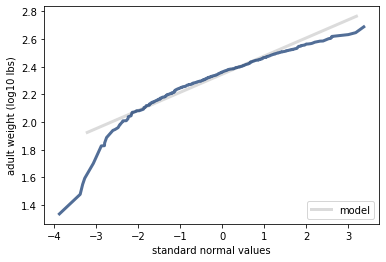

In [6]:
PlotAdultWeights(live)

**Outcome**

You can tell with n=40 that we have lognormal except for lower births. This is evident with the straight line and significant dips at the negatives
You can tell based off oru randomness that we are log normal, but with anything a different distrubition might not be log normal if ages or weights vary significantly from what we are doing randomly
You can also tell the corrlation with the straight line that there are more normal values as weight increases. 